# Support Vector Machines (SVMs)

## Learning objectives
- understand how SVMs work
- understand how the kernel trick always makes space separable
- use the SkLearn library to implement a SVM

## Intro - Which decision boundary is better?

Support vector machines can be used for both classification and regression. For now, we will focus on the classification problem.

# show different decision boundaries with different margins on separable data and try to get people to describe that the larger margin is better

One way to choose which decision boundary is best would be to find the one which separates the different classes by the greatest margin.


## what is a support vector machine?

SVMs produce point estimates for either regression or classification problems. 
It does not output probabilities like logistic regression or predict the most likely value from a distribution like in linear regression.
The decision boundary that they produce is characterised by having the margin of the greatest possible width.

# diagram showing the margin

We will start by looking at how SVMs handle binary classification, for data that is linearly separable.

This is different but similar to how logistic regression performs classification, 
logistic regression considers all of the points to determine the best hyperplane, whereas SVMs only consider the support vectors.
Outliers will influence the decision boundary for logistic regression as a result, but would not do so for an SVM.

Like linear and logistic regression, we can start building a SVM using a linear function. This linear function will depend on both a vector of weights and a bias, so SVMs are parametric models.
In the classification case SVMs predict true if the model output is positive and false if negative.

The desicion boundary is given by:
# $f(x) = wx + b = 0$

That means that any point which evaluates to $f(x) = 0$ is directly on the decision boundary.

The classification is made by the function 

# $H(x) = sign(f(x)) = sign(wx + b)$

For any examples that the SVM will classify as positive, $f(x) \geq 0$.
For any examples that the SVM will classify as negative, $f(x) \leq 0$.

For binary classification using SVMs, the labels are not 1 or 0 like we have seen up to this point.
Instead, the labels are +1 or -1.

Some examples within each class will lie directly on the boundary of the margin, where $f(x) = +1$ for positive examples, and $f(x) = -1$ for negative examples.
These examples are known as the support vectors.
We will talk further about how the support vectors are found soon.

# diagram showing the support vectors, classification labels 

SVMs make a point estimate, rather than outputting a probability or a probability distribution.

## What is the objective function?
How can we quantify the size of the boundary as a function of our data and our model parameters? 

As mentioned, we want to maximise the margin, so that examples are separated by as much space as possible.
We could get an expression for the width of the margin by projecting a vector that crosses from one side of the margin to the other in a direction perpendicular to the decision boundary.
How can we get these 2 things?

# diagram of how to quantify width of margin using support vectors and the weights

### 1. A vector that crosses the margin
We know the equation of vectors (positive example support vectors) that are along the top of the margin is
# $f(x_+) = wx_+ + b = +1$
And that the equation of vectors (negative example support vectors) that are along the bottom of the margin is
# $f(x_-) = wx_- + b = -1$
The difference between any pair of points on each of these lines:
# $x_+ - x_-$

### 2. A unit vector perpendicular to the decision boundary
The vector of weights points perpendicular to the decision boundary.

# diagram and equations to show that the weights of the model are a vector perpendicular to the decision hyperplane

To make this a unit vector we can divide by it's L2 norm.
# $\frac{\omega}{||\omega||}$

### Taking their dot product to project onto one another
# $(x_+ - x_-) \frac{w}{||w||} = (wx_+ - wx_-)  \frac{1}{||w||} = [(1 - b) - (-1 - b)]  \frac{1}{||w||} = \frac{2}{||w||}$

This is the width of the margin.
This is what we want to maximise.
Equivalently, we minimise
# $J = ||w||$

### Isn't the optimal parameterisation a zero vector then?

If the whole objective function were given by $||w||$, then yes, a zero vector would minimise the above objective.
But, we need to minimise that subject to some constraint, which will add terms to the loss function.
So the $J$ shown above is not the entire thing that we are trying to minimise.

The constraint is that all of our examples must be classified correctly (assuming that they are linearly separable, and hence are possible to separate with this simple model's decision hyperplane, for the moment).

### How can we specify the constraints?
The contribution to the loss function from each example depends on whether they are classified correctly.
That is, do they lie on the correct side of the decision boundary?
If they lie on the correct side of the desicion boundary they should not contribute to the loss.
If they lie on the incorrect side of the desicion boundary they should contribute to the loss.
In this case we let the amount contributed to the loss be equal to the perpendicular distance of the example over the decision boundary, if it is classified incorrectly.

Because the loss contribution for each example depends on its label, we could use a function that looks at each example and treats different classes differently.

Or we could combine the hypothesis with the label
# $f(x_+) = wx_+ + b = +1$

To produce the following function, which will hold true for any example that is correctly classified, regardless of it's label.

# $y_i(wx_i + b) \geq 1$

# diagram to show each case

### So in total, our objective function is described by:
# minimise $||w||$, subject to $y_i(wx_i + b) \geq 1 \ \forall \ i = 1, ..., M$

In practice, we optimise the squared L2 norm ,$||w||^2$.
This is because it has the same optima, and it is faster to optimise because the gradient is steeper.
# note The second derivative is non-zero.

# draw the equations, color code to highlight what each part means

## Training your support vector machine


Because the objective has linear inequality constraints
This constrained optimisation objective can be expressed in a single equation using Lagrange multipliers
, but the implementation of that is out of scope of this course.

This is the equation produced by that:
# show constrained objective and unconstrained objective with lagrange multipliers.

As such, this is the only model that we wont implement from scratch.

This objective above is known as the primal formulation of the objective function. 
There is however, another form.

## Dual form

## L_D = ... show the dual objective

A particular optimisation algorithm was developed specifically for optmising the dual objectve formulation for SVMs (particularly with kernels, which we will discuss later).
It is known as Sequential Minimal Optimisation (SMO).

Check it out how SVMs are fit [here](https://web.stanford.edu/~hastie/Papers/ESLII.pdf#700).

## The result
What we need to be concerned with is the result of this optimisation. 
It results in a vector of $\alphas$ each element corresponding to a single example.
Each $\alpha$ controls the contribution of the corresponding example to the loss function.
After optimisation, most of the $\alphas$ will be 0.
Only the $\alphas$ corresponding to the support vectors will be non-zero.
This indicates that the decision hyperplane depends only on these support vectors, which lie along the margin boundaries.

# diagram showing alphas of example points

## SkLearn implementation

Firstly let's make some data


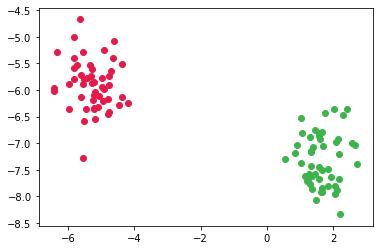

In [3]:
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import sklearn.datasets
from get_colors import colors

def get_data(sd=6, m=100, n_features=2, n_clusters=2):
    X, Y = sklearn.datasets.make_blobs(n_samples=m, n_features=n_features, centers=n_clusters, cluster_std=sd)
    return X, Y

def show_data(X, Y, predictions=None):
    for i in range(min(Y), max(Y)+1):
        y = Y == i
        x = X[y]
        plt.scatter(x[:, 0], x[:, 1], c=colors[i])
        if predictions is not None:
            y = predictions == i
            x = X[y]
            plt.scatter(x[:, 0], x[:, 1], c=colors[i], marker='x', s=100)
    plt.show()

m = 100
n_features = 2
n_classes = 2
X, Y = get_data(0.5, m, n_features, n_classes)
show_data(X, Y)

## Sklearn implementation

[0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0
 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0]


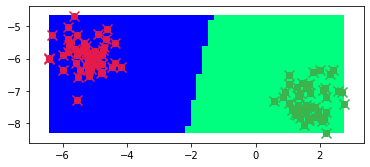

In [5]:
import sklearn.svm
from get_colors import colors
from utils import colors, visualise_predictions

svm = sklearn.svm.SVC(kernel='linear')

svm.fit(X, Y)

predictions = svm.predict(X).astype(int)

print(predictions)

visualise_predictions(svm.predict, X)
show_data(X, Y, predictions)


## What if my data is not linearly separable?

## Hard margin SVM vs soft margin SVM

### What is a soft margin?
A soft margin allows some examples to be on the incorrect side of the decision hyperplane.

If a straight line that separates the examples of each class can not be found, we can give the model some slack and allow a number of examples to be misclassified.
An extra term is added to the loss function that penalises the objective proportionally to the distance between the point and the decision boundary, if the datapoint is within the margin or on the wrong side of it.
Another constraint is added to the objective that constrains the total sum of these proportional distances to be less than a given hyperparameter $C$.
The larger $C$, the less errors are tolerated.

$C = \infty$ defines a hard margin SVM (infinite penalty for any misclassification)

# drawing of eta misclassification distances

# draw the new objective function with misclassification constraint

### Why allow a soft margin?
#### Non-separable data
The hard margin will not provide a solution if the data is not linearly separable.

In this case, we will have to change our objective function to tolerate some error. 
In the next section we will discuss how to quantify the amount of error tolerated.

#### Overfitting

Some examples may be outliers. Which we dont to influence the decision hyperplane. Doing so may make our model too specific to the training data and cause overfitting. 

We can apply some regularisation to the model to improve the generalisation error.

# ignoring outlier to 

This can make the margin larger. The width of the margin is the distance by which support vectors of opposite classes are separated. If they are separated by a larger region, it's more obvious what class they belong too, and we can have more confidence in our predictions.

# diagram of larger margin 

A larger margin means a greater confidence zone.

In [ ]:
X, Y = get_data(5)
show_data(X, Y)

Let's fit an SVM to this data which is not linearly separable, using a hard margin. I.E. $C=\infinity$

In [ ]:
# svm = sklearn.svm.SVC(kernel='linear', C=1000000000000000000000000)#float('inf'))

# svm.fit(X, Y)
# print('number of support vectors:', svm.n_support_)

# predictions = svm.predict(X).astype(int)
# visualise_predictions(svm.predict, X)
# show_data(X, Y)


Above we can see that the code keeps running indefinitely as there is no minima.
Every decision hyperplane will result in some misclassification.
Each misclassified example will have a non-zero slack variable which is then multiplied by $C$, that is by infinity.
Everywhere on the loss surface will be at this constant infinite value, so there is no optima.

now the SVM is not capable of drawing a linear decision boundary that splits the data and classifies it correctly.


The default value for $C$ is 1.

Let's try out some different values for $C$.



In [ ]:
cs = [0.01, 0.1, 1, 10, 100, 1000]

X, Y = get_data(2)

for c in cs:
    svm = sklearn.svm.SVC(kernel='linear', C=c)
    svm.fit(X, Y)
    visualise_predictions(svm.predict, X)
    show_data(X, Y)

# Kernels

However, it is easy to imagine a case where the data is not linearly separable, but may be easily split, perfectly by some non-linear decision boundary.
For example, look at the data below.

In [ ]:
def make_circles():
    X, Y = sklearn.datasets.make_circles(noise=0.1, factor=0.2)
    return X, Y

X, Y = make_circles()
# show_data(X, Y)
svm = sklearn.svm.SVC(kernel='linear')
svm.fit(X, Y)
print('number of support vectors:', svm.n_support_)
predictions = svm.predict(X).astype(int)
visualise_predictions(svm.predict, X)
show_data(X, Y)

The data is again, not linearly separable. 
But in this case you can imagine a circular decision boundary within the outer class that would easily split the data perfectly.


# zisserman diagram

Above, we have applied a function to create a new transformation of each example, and we can draw a straight line in this new transformed space that correctly separates the data.

We can project examples into a (usually higher dimensional) space where it is linearly separable.

When this boundary is projected back into the original space, it can be highly nonlinear, as we will see.

# showing how the circles data is linearly separable in transformed space, but that the decision boundary in the original space is circles 

## Kernels
Kernels allow us to write the hypothesis in terms of weighted inner products between examples.

# diagram to show this^

---

For example, there exists a vector $\alpha$ such that
## $f(x) = wx + b = \Sigma_i^m \alpha_i x^Tx_i$

# show equivalence of above with examples
# find some parameters drawn diagram

Kernel functions take the form of an inner product between two vectors that have been transformed by some function:

# $$ K(x, x_i) = \phi(x) \cdot \phi(x_i) $$

So in our case, we can express the hypothesis as 
# $$ f(x) = \Sigma_i^m \alpha_i K(x, x_i) $$

### What does this mean intuitively?

As you know, a dot product between examples x and x_i is often used to compare their similarity.
So we can consider this view of a hypothesis as a template matching procedure asking: 

"which examples in the dataset should each input be compared to, and does similarity make the input more or less likely a member of the positive class?".

Furthermore, only the support vectors will have non-zero alphas, so the procedure is more like: 

"which **support vectors** should each input be compared to, and does similarity make the input more or less likely a member of the positive class?".

---

Before taking this inner product between examples, we can transform each example in feature space.
This is reasonable because it's like you measured different features rather than the ones you have by default. 
E.g. you record floor area of a house rather than just width and length, which is a feature that could be produces by a transformation combining them both.
Once the raw features have been transformed into a new arrangement, they may then be linearly separable!

The hypothesis would then become
## $h(x) = w \phi(x) + b$
where $\phi(x)$ is the input transformed into the new space by the function $\phi$.

The problem is that the transformation which is required to make the data linearly separable may be extremely complicated, and hard to find.
This is where something called the **kernel trick** comes in.

## The Kernel Trick

The Kernel Trick is a mathematical trick that means that we don't even need to know what transformation we are applying to our original data.

### What's the advantage of expressing the hypothesis in terms of a kernel function?

We could use any function to transform the original features.
The kernel function then computes the dot product between the input and another example after they have undergone that transformation.
A transformation with this capacity may be computationally expensive to apply, especially to every example.

The **trick** is that we don't actually apply \phi to each example. 
Instead, we use kernel functions that take in both the current input, and the example to compare it with, and perform a computationally cheap transformation **that is equivalent** to the dot product between the two examples after they've had \phi applied.

Below are some examples of the most popular kernel functions that illustrate this.

![](images/svm_kernel_trick.png)
![](images/svm_poly_kernel.png)
![](images/svm_rbf_kernel.png)

To evaluate $K$, we don't need any knowledge of $\phi$ at all! This is the Kernel Trick.


In [ ]:
class LinearKernel:
    def __init__(self, X):
        self.X = X

    def linear_kernel(x):
        k = np.dot(X, x) # template match against all other examples
        return k


class SVM:
    def __init__(self, n_features=2, n_classes=10):
        self.w = np.random.rand(n_features, n_classes)
        self.b = np.random.rand(n_classes)

    def predict(self, x):
        h = np.matmul(x, self.w) + self.b
        return np.sign(h)

## SkLearn implementation

## Try out the different kernels

Look

## Exploring the different kernels

### Try out different sigma and see the effect on the decision boundary.

Why does an RBF kernel not overfit? 
In an infinite dimens
I don't have an answer.

